<a href="https://colab.research.google.com/github/ChinthakindhiNishitha/ML-LAB/blob/main/PCATechnique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


/tmp/ipython-input-2920733227.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


Shape after scaling: (891, 5)
Explained variance ratio: [0.33960812 0.32520788]
Accuracy: 0.6343283582089553

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.81      0.73       165
           1       0.54      0.36      0.43       103

    accuracy                           0.63       268
   macro avg       0.60      0.58      0.58       268
weighted avg       0.62      0.63      0.62       268



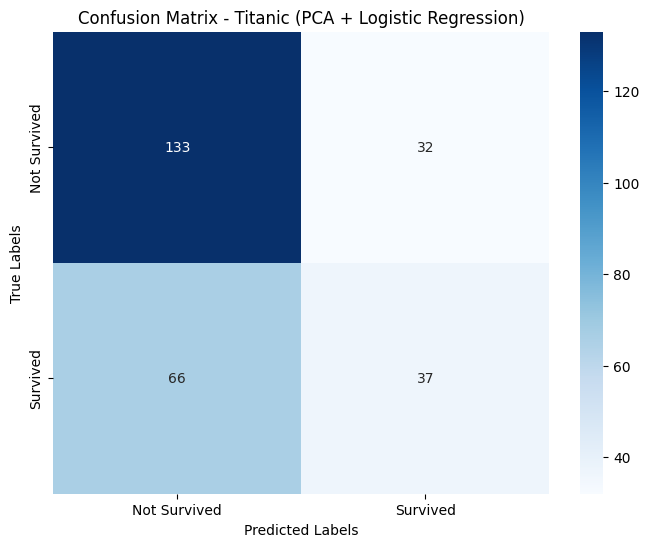

In [6]:


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score





# 2. Select useful numeric features
features = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
df = df[features + ["Survived"]]

# Handle missing values (Age has NaNs)
df["Age"].fillna(df["Age"].median(), inplace=True)

X = df[features]
y = df["Survived"]

# 3. Standardize the variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape after scaling:", X_scaled.shape)

# 4. Apply PCA (2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# 6. Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 7. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Survived", "Survived"],
            yticklabels=["Not Survived", "Survived"])
plt.title("Confusion Matrix - Titanic (PCA + Logistic Regression)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


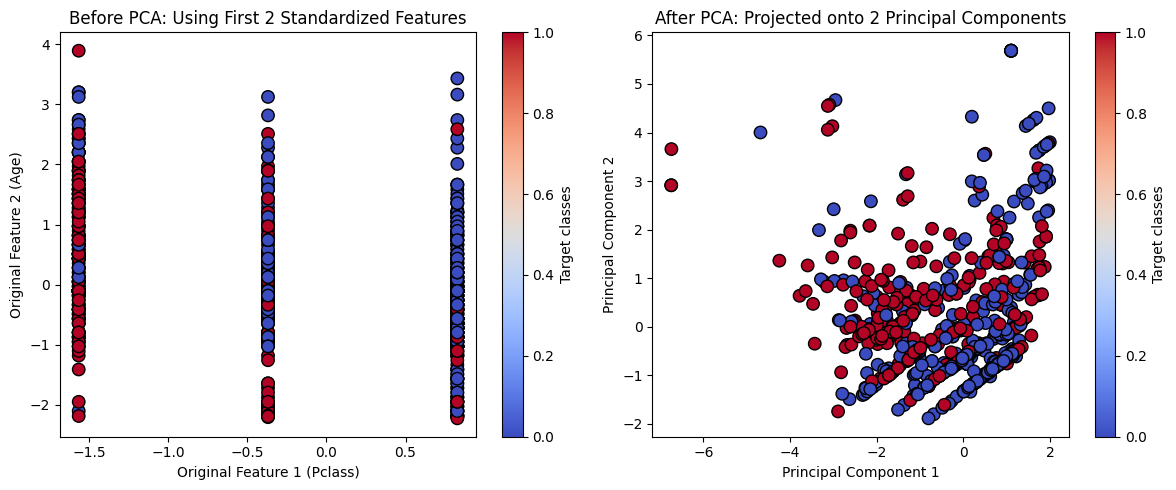

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert target labels into numeric
y_numeric = pd.factorize(y)[0]

plt.figure(figsize=(12, 5))

# --- Before PCA: just first 2 standardized features ---
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Original Feature 1 (Pclass)')
plt.ylabel('Original Feature 2 (Age)')
plt.title('Before PCA: Using First 2 Standardized Features')
plt.colorbar(label='Target classes')

# --- After PCA ---
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA: Projected onto 2 Principal Components')
plt.colorbar(label='Target classes')

plt.tight_layout()
plt.show()


In [8]:
# PCA loadings (importance of variables in PCs)
loadings = pd.DataFrame(pca.components_.T,
                        index=features,
                        columns=['PC1', 'PC2'])
print(loadings)


             PC1       PC2
Pclass  0.678950 -0.051643
Age    -0.457655 -0.315236
SibSp   0.124736  0.615183
Parch   0.031850  0.619955
Fare   -0.559469  0.367648


In [9]:
explained_var = pca.explained_variance_ratio_
print("Explained variance ratio for each PC:", explained_var)
print("PC1 + PC2 variance explained:", explained_var[0] + explained_var[1])


Explained variance ratio for each PC: [0.33960812 0.32520788]
PC1 + PC2 variance explained: 0.6648159969553279
